In [601]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#using matplotlib’s ggplot style
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition,linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier,Lasso,LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score,precision_recall_curve,roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning

In [541]:
path ='/Users/gyang/Desktop/yang_project/capstone/data/'

## Independent Variable

In [542]:
total = pd.read_csv(path + 'all_year_with_target.csv')

In [543]:
#total.columns.values

In [544]:
total.head()

,GeoName,year,Compensation of employees,Gross domestic product (GDP) by state,Gross operating surplus,Per capita real GDP by state,Quantity indexes for real GDP by state,Real GDP by state,Subsidies,Taxes on production and imports,...,Equals: Disposable personal income,Personal current taxes,state,contract_establish,end_establish,expand_establish,net_change,open_establish,total_contract,total_expand
0,Alabama,1997,61240,104309.0,36814,31465.0,81.042,137437.0,-328,6582,...,83209782.0,10612417.0,Alabama,648756,138914,654734,41822,174758,787670,829492
1,Alaska,1997,12205,25763.0,11234,62577.0,75.935,38358.0,-62,2386,...,15203610.0,1844364.0,Alaska,158148,37718,168904,15276,42238,195866,211142
2,Arizona,1997,69886,132795.0,54249,34485.0,67.195,163353.0,-383,9044,...,94533284.0,12903928.0,Arizona,833670,228694,1013832,198484,247016,1062364,1260848
3,Arkansas,1997,32852,60248.0,23415,30470.0,79.178,79256.0,-298,4279,...,46699786.0,5709269.0,Arkansas,371418,86722,412804,49658,94994,458140,507798
4,California,1997,574394,1082051.0,441963,41314.0,70.134,1342133.0,-5725,71419,...,761138752.0,120765010.0,California,6281922,2167120,7002930,605040,2051152,8449042,9054082


In [548]:
state_list =total.GeoName.unique().tolist()
total_2 =total.drop(columns =['contract_establish','expand_establish','end_establish','net_change',
                              'open_establish','total_contract','total_expand'])

In [549]:
def clean_state_data(st_name):
    df_1 =total_2.loc[total_2['GeoName'] == st_name]
    df_2 =df_1.set_index(['GeoName','year'])
    df_3_1 =df_2.replace({'(NA)': np.nan ,'(L)':np.nan ,0:np.nan})
    df_3 =df_3_1.drop(columns =['state'])
    
    
    #check missing value 

    miss_col = df_3
    miss_col2 = miss_col.isnull().sum(axis =0)/float(len(miss_col))
    miss_col3 =miss_col2.sort_values(ascending=False)
    
    columns = df_3.columns
    missing_value_df = pd.DataFrame({'percent_missing': miss_col3})
    missing_value_df['percent_missing'] =missing_value_df['percent_missing'].astype('float64')
    
    miss_col =missing_value_df.loc[(missing_value_df['percent_missing'] >0) 
                               &(missing_value_df['percent_missing'] <0.4)].index.tolist()
    
    #drop columns with large missing
    del_list = missing_value_df.loc[(missing_value_df['percent_missing'] >=0.4)].index.tolist()
    df_4 = df_3.drop(columns=del_list)

    #convert NAN to -99999
    df_5 = df_4.fillna(-99999)

    #change type of columns
    convert_col =df_5.select_dtypes(include=['object']).columns.values

    for i in convert_col:
        df_5[i] = df_5[i].astype('float')

    df_6 = df_5.copy()

    #replace -99999 to mean()
    for i in miss_col:
        df_6[i] =df_6[i].replace({-99999: df_6[i].mean()})

    df_7 = df_6.copy()

    #numerical feature scaling
    scaler = MinMaxScaler()
    col =df_7.columns.values
    df_7[col] = scaler.fit_transform(df_7[col])
    
    return df_7

In [550]:
Alabama =clean_state_data(state_list[0])
Alaska =clean_state_data(state_list[1])
Arizona =clean_state_data(state_list[2])
Arkansas =clean_state_data(state_list[3])
California =clean_state_data(state_list[4])

Colorado =clean_state_data(state_list[5])
Connecticut =clean_state_data(state_list[6])
Delaware =clean_state_data(state_list[7])
Florida =clean_state_data(state_list[8])
Georgia =clean_state_data(state_list[9])

Hawaii =clean_state_data(state_list[10])
Idaho =clean_state_data(state_list[11])
Illinois =clean_state_data(state_list[12])
Indiana =clean_state_data(state_list[13])
Iowa =clean_state_data(state_list[14])

Kansas =clean_state_data(state_list[15])
Kentucky =clean_state_data(state_list[16])
Louisiana =clean_state_data(state_list[17])
Maine =clean_state_data(state_list[18])
Maryland =clean_state_data(state_list[19])

Massachusetts =clean_state_data(state_list[20])
Michigan =clean_state_data(state_list[21])
Minnesota =clean_state_data(state_list[22])
Mississippi =clean_state_data(state_list[23])
Missouri =clean_state_data(state_list[24])

Montana =clean_state_data(state_list[25])
Nebraska =clean_state_data(state_list[26])
Nevada =clean_state_data(state_list[27])
NewHampshire =clean_state_data(state_list[28])
NewJersey =clean_state_data(state_list[29])

NewMexico =clean_state_data(state_list[30])
NewYork =clean_state_data(state_list[31])
NorthCarolina =clean_state_data(state_list[32])
NorthDakota =clean_state_data(state_list[33])
Ohio =clean_state_data(state_list[34])

Oklahoma =clean_state_data(state_list[35])
Oregon =clean_state_data(state_list[36])
Pennsylvania =clean_state_data(state_list[37])
RhodeIsland =clean_state_data(state_list[38])
SouthCarolina =clean_state_data(state_list[39])

SouthDakota =clean_state_data(state_list[40])
Tennessee =clean_state_data(state_list[41])
Texas =clean_state_data(state_list[42])
Utah =clean_state_data(state_list[43])
Vermont =clean_state_data(state_list[44])

Virginia =clean_state_data(state_list[45])
Washington =clean_state_data(state_list[46])
WestVirginia =clean_state_data(state_list[47])
Wisconsin =clean_state_data(state_list[48])
Wyoming =clean_state_data(state_list[49])

DC =clean_state_data(state_list[50])

In [551]:
# split data
def split_data(data):
    x_train,x_test =data.iloc[1:15,],data.iloc[15:,]
    return x_train,x_test

In [552]:
# split data

x_train_alabama,x_test_alabama =split_data(Alabama)
x_train_alaska,x_test_alaska =split_data(Alaska)
x_train_arizona,x_test_arizona =split_data(Arizona)
x_train_arkansas,x_test_arkansas =split_data(Arkansas)
x_train_california,x_test_california =split_data(California)
x_train_colorado,x_test_colorado =split_data(Colorado)
x_train_connecticut,x_test_connecticut =split_data(Connecticut)
x_train_delaware,x_test_delaware =split_data(Delaware)
x_train_dc,x_test_dc =split_data(DC)
x_train_florida,x_test_florida =split_data(Florida)
x_train_georgia,x_test_georgia =split_data(Georgia)
x_train_hawaii,x_test_hawaii =split_data(Hawaii)
x_train_idaho,x_test_idaho =split_data(Idaho)
x_train_illinois,x_test_illinois =split_data(Illinois)
x_train_indiana,x_test_indiana =split_data(Indiana)
x_train_iowa,x_test_iowa =split_data(Iowa)
x_train_kansas,x_test_kansas =split_data(Kansas)
x_train_kentucky,x_test_kentucky =split_data(Kentucky)
x_train_louisiana,x_test_louisiana =split_data(Louisiana)
x_train_maine,x_test_maine =split_data(Maine)
x_train_maryland,x_test_maryland =split_data(Maryland)
x_train_massachusetts,x_test_massachusetts =split_data(Massachusetts)
x_train_michigan,x_test_michigan =split_data(Michigan)
x_train_minnesota,x_test_minnesota =split_data(Minnesota)
x_train_mississippi,x_test_mississippi =split_data(Mississippi)
x_train_missouri,x_test_missouri =split_data(Missouri)
x_train_nebraska,x_test_nebraska =split_data(Nebraska)
x_train_nevada,x_test_nevada =split_data(Nevada)
x_train_newhampshire,x_test_newhampshire =split_data(NewHampshire)
x_train_newjersey,x_test_newjersey =split_data(NewJersey)
x_train_newmexico,x_test_newmexico =split_data(NewMexico)
x_train_newyork,x_test_newyork =split_data(NewYork)
x_train_northcarolina,x_test_northcarolina =split_data(NorthCarolina)
x_train_northdakota,x_test_northdakota =split_data(NorthDakota)
x_train_ohio,x_test_ohio =split_data(Ohio)
x_train_oklahoma,x_test_oklahoma =split_data(Oklahoma)
x_train_oregon,x_test_oregon =split_data(Oregon)
x_train_pennsylvania,x_test_pennsylvania =split_data(Pennsylvania)
x_train_rhodeisland,x_test_rhodeisland =split_data(RhodeIsland)
x_train_southcarolina,x_test_southcarolina =split_data(SouthCarolina)
x_train_southdakota,x_test_southdakota =split_data(SouthDakota)
x_train_tennessee,x_test_tennessee =split_data(Tennessee)
x_train_texas,x_test_texas =split_data(Texas)
x_train_utah,x_test_utah =split_data(Utah)
x_train_vermont,x_test_vermont =split_data(Vermont)
x_train_virginia,x_test_virginia =split_data(Virginia)
x_train_washington,x_test_washington =split_data(Washington)
x_train_westvirginia,x_test_westvirginia =split_data(WestVirginia)
x_train_wisconsin,x_test_wisconsin =split_data(Wisconsin)
x_train_utah,x_test_utah =split_data(Utah)
x_train_wyoming,x_test_wyoming =split_data(Wyoming)

## Dependent Variable

SME Increase (Comapare with last year) =1;Decrease =0 <br\>
1997 ~2016 Year

In [554]:
#PATH2 ='/Users/gyang/Desktop/yang_project/capstone/data/dependent_variable_state_data_cleaned/'

In [555]:
#al_df =pd.read_table(PATH2+'Alabama.txt',sep='/',header=None)
#al_df.columns=['year','month','net_change','total_expand','expand_establish',
#                'open_establish','total_contract','contract_establish','end_establish']
#al_year = al_df.groupby(['year'], as_index=False)[['expand_establish']].mean()
#al_year['year'] = al_year['year'].astype('int64')

In [556]:
target_df =total[['year','GeoName','contract_establish',
                  'expand_establish','end_establish','net_change',
                  'open_establish','total_contract','total_expand']]

In [557]:
target_df.head()

,year,GeoName,contract_establish,expand_establish,end_establish,net_change,open_establish,total_contract,total_expand
0,1997,Alabama,648756,654734,138914,41822,174758,787670,829492
1,1997,Alaska,158148,168904,37718,15276,42238,195866,211142
2,1997,Arizona,833670,1013832,228694,198484,247016,1062364,1260848
3,1997,Arkansas,371418,412804,86722,49658,94994,458140,507798
4,1997,California,6281922,7002930,2167120,605040,2051152,8449042,9054082


In [561]:
target_col_list =['contract_establish','expand_establish','end_establish',
             'net_change','open_establish','total_contract','total_expand']

In [576]:
def target_label(state,target_col):
    target_df_2 =target_df[['year','GeoName',target_col]]
    al_year =target_df_2.loc[target_df['GeoName'] == state]
    al_year['lag_growth'] = al_year[target_col].shift(1)
    al_year2 =al_year.loc[al_year['year'] != 1997]

    al_year2['growth_change'] =al_year2[target_col] - al_year2['lag_growth']

    #create dependent variable
    al_year2['growth_trend'] = np.where(al_year2['growth_change'] >=0, 1, 0)
    al_year2['growth_trend'] = al_year2['growth_trend'].astype('int')

    al_year3 =al_year2[['year','growth_trend']].set_index(['year'])
    #split train and test data
    y_train, y_test =np.array(al_year3.iloc[:14,]).ravel() ,np.array(al_year3.iloc[14:,]).ravel()
    return y_train, y_test

In [581]:
# contract_establish
y_train_Alabama_target0, y_test_Alabama_target0 =target_label(state_list[0],target_col_list[0])
y_train_Alaska_target0, y_test_Alaska_target0 =target_label(state_list[1],target_col_list[0])
y_train_Arizona_target0,y_test_Arizona_target0 =target_label(state_list[2],target_col_list[0])
y_train_Arkansas_target0, y_test_Arkansas_target0 =target_label(state_list[3],target_col_list[0])
y_train_California_target0,y_test_California_target0 =target_label(state_list[4],target_col_list[0])

y_train_Colorado_target0, y_test_Colorado_target0 =target_label(state_list[5],target_col_list[0])
y_train_Connecticut_target0, y_test_Connecticut_target0 =target_label(state_list[6],target_col_list[0])
y_train_Delaware_target0, y_test_Delaware_target0 =target_label(state_list[7],target_col_list[0])
y_train_Florida_target0, y_test_Florida_target0 =target_label(state_list[8],target_col_list[0])
y_train_Georgia_target0, y_test_Georgia_target0=target_label(state_list[9],target_col_list[0])

y_train_Hawaii_target0, y_test_Hawaii_target0=target_label(state_list[10],target_col_list[0])
y_train_Idaho_target0, y_test_Idaho_target0=target_label(state_list[11],target_col_list[0])
y_train_Illinois_target0, y_test_Illinois_target0=target_label(state_list[12],target_col_list[0])
y_train_Indiana_target0, y_test_Indiana_target0 =target_label(state_list[13],target_col_list[0])
y_train_Iowa_target0, y_test_Iowa_target0=target_label(state_list[14],target_col_list[0])

y_train_Kansas_target0, y_test_Kansas_target0=target_label(state_list[15],target_col_list[0])
y_train_Kentucky_target0, y_test_Kentucky_target0=target_label(state_list[16],target_col_list[0])
y_train_Louisiana_target0, y_test_Louisiana_target0=target_label(state_list[17],target_col_list[0])
y_train_Maine_target0, y_test_Maine_target0=target_label(state_list[18],target_col_list[0])
y_train_Maryland_target0, y_test_Maryland_target0=target_label(state_list[19],target_col_list[0])

y_train_Massachusetts_target0, y_test_Massachusetts_target0 =target_label(state_list[20],target_col_list[0])
y_train_Michigan_target0, y_test_Michigan_target0=target_label(state_list[21],target_col_list[0])
y_train_Minnesota_target0, y_test_Minnesota_target0 =target_label(state_list[22],target_col_list[0])
y_train_Mississippi_target0, y_test_Mississippi_target0=target_label(state_list[23],target_col_list[0])
y_train_Missouri_target0, y_test_Missouri_target0=target_label(state_list[24],target_col_list[0])

y_train_Montana_target0, y_test_Montana_target0 =target_label(state_list[25],target_col_list[0])
y_train_Nebraska_target0, y_test_Nebraska_target0=target_label(state_list[26],target_col_list[0])
y_train_Nevada_target0, y_test_Nevada_target0=target_label(state_list[27],target_col_list[0])
y_train_NewHampshire_target0, y_test_NewHampshire_target0  =target_label(state_list[28],target_col_list[0])
y_train_NewJersey_target0, y_test_NewJersey_target0 =target_label(state_list[29],target_col_list[0])

y_train_NewMexico_target0,y_test_NewMexico_target0 =target_label(state_list[30],target_col_list[0])
y_train_NewYork_target0, y_test_NewYork_target0=target_label(state_list[31],target_col_list[0])
y_train_NorthCarolina_target0, y_test_NorthCarolina_target0=target_label(state_list[32],target_col_list[0])
y_train_NorthDakota_target0, y_test_NorthDakota_target0=target_label(state_list[33],target_col_list[0])
y_train_Ohio_target0, y_test_Ohio_target0=target_label(state_list[34],target_col_list[0])

y_train_Oklahoma_target0, y_test_Oklahoma_target0 =target_label(state_list[35],target_col_list[0])
y_train_Oregon_target0, y_test_Oregon_target0=target_label(state_list[36],target_col_list[0])
y_train_Pennsylvania_target0, y_test_Pennsylvania_target0=target_label(state_list[37],target_col_list[0])
y_train_RhodeIsland_target0, y_test_RhodeIsland_target0=target_label(state_list[38],target_col_list[0])
y_train_SouthCarolina_target0, y_test_SouthCarolina_target0=target_label(state_list[39],target_col_list[0])

y_train_SouthDakota_target0, y_test_SouthDakota_target0=target_label(state_list[40],target_col_list[0])
y_train_Tennessee_target0, y_test_Tennessee_target0=target_label(state_list[41],target_col_list[0])
y_train_Texas_target0, y_test_Texas_target0=target_label(state_list[42],target_col_list[0])
y_train_Utah_target0, y_test_Utah_target0=target_label(state_list[43],target_col_list[0])
y_train_Vermont_target0, y_test_Vermont_target0=target_label(state_list[44],target_col_list[0])

y_train_Virginia_target0 ,y_test_Virginia_target0=target_label(state_list[45],target_col_list[0])
y_train_Washington_target0 , y_test_Washington_target0=target_label(state_list[46],target_col_list[0])
y_train_WestVirginia_target0, y_test_WestVirginia_target0=target_label(state_list[47],target_col_list[0])
y_train_Wisconsin_target0, y_test_Wisconsin_target0=target_label(state_list[48],target_col_list[0])
y_train_Wyoming_target0, y_test_Wyoming_target0=target_label(state_list[49],target_col_list[0])

y_train_DC_target0, y_test_DC_target0=target_label(state_list[50],target_col_list[0])

In [582]:
# expand_establish

y_train_Alabama_target1, y_test_Alabama_target1 =target_label(state_list[0],target_col_list[1])
y_train_Alaska_target1, y_test_Alaska_target1 =target_label(state_list[1],target_col_list[1])
y_train_Arizona_target1,y_test_Arizona_target1 =target_label(state_list[2],target_col_list[1])
y_train_Arkansas_target1, y_test_Arkansas_target1 =target_label(state_list[3],target_col_list[1])
y_train_California_target1,y_test_California_target1 =target_label(state_list[4],target_col_list[1])

y_train_Colorado_target1, y_test_Colorado_target1 =target_label(state_list[5],target_col_list[1])
y_train_Connecticut_target1, y_test_Connecticut_target1 =target_label(state_list[6],target_col_list[1])
y_train_Delaware_target1, y_test_Delaware_target1 =target_label(state_list[7],target_col_list[1])
y_train_Florida_target1, y_test_Florida_target1 =target_label(state_list[8],target_col_list[1])
y_train_Georgia_target1, y_test_Georgia_target1 =target_label(state_list[9],target_col_list[1])

y_train_Hawaii_target1, y_test_Hawaii_target1 =target_label(state_list[10],target_col_list[1])
y_train_Idaho_target1, y_test_Idaho_target1 =target_label(state_list[11],target_col_list[1])
y_train_Illinois_target1, y_test_Illinois_target1 =target_label(state_list[12],target_col_list[1])
y_train_Indiana_target1, y_test_Indiana_target1 =target_label(state_list[13],target_col_list[1])
y_train_Iowa_target1, y_test_Iowa_target1 =target_label(state_list[14],target_col_list[1])

y_train_Kansas_target1, y_test_Kansas_target1 =target_label(state_list[15],target_col_list[1])
y_train_Kentucky_target1, y_test_Kentucky_target1 =target_label(state_list[16],target_col_list[1])
y_train_Louisiana_target1, y_test_Louisiana_target1 =target_label(state_list[17],target_col_list[1])
y_train_Maine_target1, y_test_Maine_target1 =target_label(state_list[18],target_col_list[1])
y_train_Maryland_target1, y_test_Maryland_target1 =target_label(state_list[19],target_col_list[1])

y_train_Massachusetts_target1, y_test_Massachusetts_target1 =target_label(state_list[20],target_col_list[1])
y_train_Michigan_target1, y_test_Michigan_target1 =target_label(state_list[21],target_col_list[1])
y_train_Minnesota_target1, y_test_Minnesota_target1 =target_label(state_list[22],target_col_list[1])
y_train_Mississippi_target1, y_test_Mississippi_target1 =target_label(state_list[23],target_col_list[1])
y_train_Missouri_target1, y_test_Missouri_target1 =target_label(state_list[24],target_col_list[1])

y_train_Montana_target1, y_test_Montana_target1 =target_label(state_list[25],target_col_list[1])
y_train_Nebraska_target1, y_test_Nebraska_target1 =target_label(state_list[26],target_col_list[1])
y_train_Nevada_target1, y_test_Nevada_target1 =target_label(state_list[27],target_col_list[1])
y_train_NewHampshire_target1, y_test_NewHampshire_target1  =target_label(state_list[28],target_col_list[1])
y_train_NewJersey_target1, y_test_NewJersey_target1 =target_label(state_list[29],target_col_list[1])

y_train_NewMexico_target1,y_test_NewMexico_target1 =target_label(state_list[30],target_col_list[1])
y_train_NewYork_target1, y_test_NewYork_target1 =target_label(state_list[31],target_col_list[1])
y_train_NorthCarolina_target1, y_test_NorthCarolina_target1 =target_label(state_list[32],target_col_list[1])
y_train_NorthDakota_target1, y_test_NorthDakota_target1 =target_label(state_list[33],target_col_list[1])
y_train_Ohio_target1, y_test_Ohio_target1 =target_label(state_list[34],target_col_list[1])

y_train_Oklahoma_target1, y_test_Oklahoma_target1 =target_label(state_list[35],target_col_list[1])
y_train_Oregon_target1, y_test_Oregon_target1 =target_label(state_list[36],target_col_list[1])
y_train_Pennsylvania_target1, y_test_Pennsylvania_target1 =target_label(state_list[37],target_col_list[1])
y_train_RhodeIsland_target1, y_test_RhodeIsland_target1 =target_label(state_list[38],target_col_list[1])
y_train_SouthCarolina_target1, y_test_SouthCarolina_target1 =target_label(state_list[39],target_col_list[1])

y_train_SouthDakota_target1, y_test_SouthDakota_target1 =target_label(state_list[40],target_col_list[1])
y_train_Tennessee_target1, y_test_Tennessee_target1 =target_label(state_list[41],target_col_list[1])
y_train_Texas_target1, y_test_Texas_target1=target_label(state_list[42],target_col_list[1])
y_train_Utah_target1, y_test_Utah_target1=target_label(state_list[43],target_col_list[1])
y_train_Vermont_target1, y_test_Vermont_target1=target_label(state_list[44],target_col_list[1])

y_train_Virginia_target1 ,y_test_Virginia_target1 =target_label(state_list[45],target_col_list[1])
y_train_Washington_target1 , y_test_Washington_target1 =target_label(state_list[46],target_col_list[1])
y_train_WestVirginia_target1, y_test_WestVirginia_target1 =target_label(state_list[47],target_col_list[1])
y_train_Wisconsin_target1, y_test_Wisconsin_target1 =target_label(state_list[48],target_col_list[1])
y_train_Wyoming_target1, y_test_Wyoming_target1 =target_label(state_list[49],target_col_list[1])

y_train_DC_target1, y_test_DC_target1 =target_label(state_list[50],target_col_list[1])

In [583]:
# end_establish

y_train_Alabama_target2, y_test_Alabama_target2 =target_label(state_list[0],target_col_list[2])
y_train_Alaska_target2, y_test_Alaska_target2 =target_label(state_list[1],target_col_list[2])
y_train_Arizona_target2,y_test_Arizona_target2 =target_label(state_list[2],target_col_list[2])
y_train_Arkansas_target2, y_test_Arkansas_target2 =target_label(state_list[3],target_col_list[2])
y_train_California_target2,y_test_California_target2 =target_label(state_list[4],target_col_list[2])

y_train_Colorado_target2, y_test_Colorado_target2 =target_label(state_list[5],target_col_list[2])
y_train_Connecticut_target2, y_test_Connecticut_target2 =target_label(state_list[6],target_col_list[2])
y_train_Delaware_target2, y_test_Delaware_target2 =target_label(state_list[7],target_col_list[2])
y_train_Florida_target2, y_test_Florida_target2 =target_label(state_list[8],target_col_list[2])
y_train_Georgia_target2, y_test_Georgia_target2 =target_label(state_list[9],target_col_list[2])

y_train_Hawaii_target2, y_test_Hawaii_target2 =target_label(state_list[10],target_col_list[2])
y_train_Idaho_target2, y_test_Idaho_target2 =target_label(state_list[11],target_col_list[2])
y_train_Illinois_target2, y_test_Illinois_target2 =target_label(state_list[12],target_col_list[2])
y_train_Indiana_target2, y_test_Indiana_target2 =target_label(state_list[13],target_col_list[2])
y_train_Iowa_target2, y_test_Iowa_target2 =target_label(state_list[14],target_col_list[2])

y_train_Kansas_target2, y_test_Kansas_target2 =target_label(state_list[15],target_col_list[2])
y_train_Kentucky_target2, y_test_Kentucky_target2 =target_label(state_list[16],target_col_list[2])
y_train_Louisiana_target2, y_test_Louisiana_target2 =target_label(state_list[17],target_col_list[2])
y_train_Maine_target2, y_test_Maine_target2 =target_label(state_list[18],target_col_list[2])
y_train_Maryland_target2, y_test_Maryland_target2 =target_label(state_list[19],target_col_list[2])

y_train_Massachusetts_target2, y_test_Massachusetts_target2 =target_label(state_list[20],target_col_list[2])
y_train_Michigan_target2, y_test_Michigan_target2 =target_label(state_list[21],target_col_list[2])
y_train_Minnesota_target2, y_test_Minnesota_target2 =target_label(state_list[22],target_col_list[2])
y_train_Mississippi_target2, y_test_Mississippi_target2=target_label(state_list[23],target_col_list[2])
y_train_Missouri_target2, y_test_Missouri_target2=target_label(state_list[24],target_col_list[2])

y_train_Montana_target2, y_test_Montana_target2 =target_label(state_list[25],target_col_list[2])
y_train_Nebraska_target2, y_test_Nebraska_target2 =target_label(state_list[26],target_col_list[2])
y_train_Nevada_target2, y_test_Nevada_target2 =target_label(state_list[27],target_col_list[2])
y_train_NewHampshire_target2, y_test_NewHampshire_target2 =target_label(state_list[28],target_col_list[2])
y_train_NewJersey_target2, y_test_NewJersey_target2 =target_label(state_list[29],target_col_list[2])

y_train_NewMexico_target2,y_test_NewMexico_target2 =target_label(state_list[30],target_col_list[2])
y_train_NewYork_target2, y_test_NewYork_target2 =target_label(state_list[31],target_col_list[2])
y_train_NorthCarolina_target2, y_test_NorthCarolina_target2 =target_label(state_list[32],target_col_list[2])
y_train_NorthDakota_target2, y_test_NorthDakota_target2 =target_label(state_list[33],target_col_list[2])
y_train_Ohio_target2, y_test_Ohio_target2 =target_label(state_list[34],target_col_list[2])

y_train_Oklahoma_target2, y_test_Oklahoma_target2 =target_label(state_list[35],target_col_list[2])
y_train_Oregon_target2, y_test_Oregon_target2 =target_label(state_list[36],target_col_list[2])
y_train_Pennsylvania_target2, y_test_Pennsylvania_target2 =target_label(state_list[37],target_col_list[2])
y_train_RhodeIsland_target2, y_test_RhodeIsland_target2 =target_label(state_list[38],target_col_list[2])
y_train_SouthCarolina_target2, y_test_SouthCarolina_target2 =target_label(state_list[39],target_col_list[2])

y_train_SouthDakota_target2, y_test_SouthDakota_target2 =target_label(state_list[40],target_col_list[2])
y_train_Tennessee_target2, y_test_Tennessee_target2 =target_label(state_list[41],target_col_list[2])
y_train_Texas_target2, y_test_Texas_target2 =target_label(state_list[42],target_col_list[2])
y_train_Utah_target2, y_test_Utah_target2 =target_label(state_list[43],target_col_list[2])
y_train_Vermont_target2, y_test_Vermont_target2 =target_label(state_list[44],target_col_list[2])

y_train_Virginia_target2 ,y_test_Virginia_target2 =target_label(state_list[45],target_col_list[2])
y_train_Washington_target2 , y_test_Washington_target2 =target_label(state_list[46],target_col_list[2])
y_train_WestVirginia_target2, y_test_WestVirginia_target2 =target_label(state_list[47],target_col_list[2])
y_train_Wisconsin_target2, y_test_Wisconsin_target2 =target_label(state_list[48],target_col_list[2])
y_train_Wyoming_target2, y_test_Wyoming_target2 =target_label(state_list[49],target_col_list[2])

y_train_DC_target2, y_test_DC_target2 =target_label(state_list[50],target_col_list[2])

In [584]:
# net_change

y_train_Alabama_target3, y_test_Alabama_target3 =target_label(state_list[0],target_col_list[3])
y_train_Alaska_target3, y_test_Alaska_target3 =target_label(state_list[1],target_col_list[3])
y_train_Arizona_target3,y_test_Arizona_target3 =target_label(state_list[2],target_col_list[3])
y_train_Arkansas_target3, y_test_Arkansas_target3 =target_label(state_list[3],target_col_list[3])
y_train_California_target3,y_test_California_target3 =target_label(state_list[4],target_col_list[3])

y_train_Colorado_target3, y_test_Colorado_target3 =target_label(state_list[5],target_col_list[3])
y_train_Connecticut_target3, y_test_Connecticut_target3 =target_label(state_list[6],target_col_list[3])
y_train_Delaware_target3, y_test_Delaware_target3 =target_label(state_list[7],target_col_list[3])
y_train_Florida_target3, y_test_Florida_target3 =target_label(state_list[8],target_col_list[3])
y_train_Georgia_target3, y_test_Georgia_target3 =target_label(state_list[9],target_col_list[3])

y_train_Hawaii_target3, y_test_Hawaii_target3 =target_label(state_list[10],target_col_list[3])
y_train_Idaho_target3, y_test_Idaho_target3 =target_label(state_list[11],target_col_list[3])
y_train_Illinois_target3, y_test_Illinois_target3 =target_label(state_list[12],target_col_list[3])
y_train_Indiana_target3, y_test_Indiana_target3 =target_label(state_list[13],target_col_list[3])
y_train_Iowa_target3, y_test_Iowa_target3 =target_label(state_list[14],target_col_list[3])

y_train_Kansas_target3, y_test_Kansas_target3 =target_label(state_list[15],target_col_list[3])
y_train_Kentucky_target3, y_test_Kentucky_target3 =target_label(state_list[16],target_col_list[3])
y_train_Louisiana_target3, y_test_Louisiana_target3 =target_label(state_list[17],target_col_list[3])
y_train_Maine_target3, y_test_Maine_target3 =target_label(state_list[18],target_col_list[3])
y_train_Maryland_target3, y_test_Maryland_target3 =target_label(state_list[19],target_col_list[3])

y_train_Massachusetts_target3, y_test_Massachusetts_target3 =target_label(state_list[20],target_col_list[3])
y_train_Michigan_target3, y_test_Michigan_target3 =target_label(state_list[21],target_col_list[3])
y_train_Minnesota_target3, y_test_Minnesota_target3 =target_label(state_list[22],target_col_list[3])
y_train_Mississippi_target3, y_test_Mississippi_target3 =target_label(state_list[23],target_col_list[3])
y_train_Missouri_target3, y_test_Missouri_target3 =target_label(state_list[24],target_col_list[3])

y_train_Montana_target3, y_test_Montana_target3 =target_label(state_list[25],target_col_list[3])
y_train_Nebraska_target3, y_test_Nebraska_target3 =target_label(state_list[26],target_col_list[3])
y_train_Nevada_target3, y_test_Nevada_target3 =target_label(state_list[27],target_col_list[3])
y_train_NewHampshire_target3, y_test_NewHampshire_target3  =target_label(state_list[28],target_col_list[3])
y_train_NewJersey_target3, y_test_NewJersey_target3 =target_label(state_list[29],target_col_list[3])

y_train_NewMexico_target3,y_test_NewMexico_target3 =target_label(state_list[30],target_col_list[3])
y_train_NewYork_target3, y_test_NewYork_target3 =target_label(state_list[31],target_col_list[3])
y_train_NorthCarolina_target3, y_test_NorthCarolina_target3 =target_label(state_list[32],target_col_list[3])
y_train_NorthDakota_target3, y_test_NorthDakota_target3 =target_label(state_list[33],target_col_list[3])
y_train_Ohio_target3, y_test_Ohio_target3 =target_label(state_list[34],target_col_list[3])

y_train_Oklahoma_target3, y_test_Oklahoma_target3 =target_label(state_list[35],target_col_list[3])
y_train_Oregon_target3, y_test_Oregon_target3 =target_label(state_list[36],target_col_list[3])
y_train_Pennsylvania_target3, y_test_Pennsylvania_target3=target_label(state_list[37],target_col_list[3])
y_train_RhodeIsland_target3, y_test_RhodeIsland_target3=target_label(state_list[38],target_col_list[3])
y_train_SouthCarolina_target3, y_test_SouthCarolina_target3 =target_label(state_list[39],target_col_list[3])

y_train_SouthDakota_target3, y_test_SouthDakota_target3 =target_label(state_list[40],target_col_list[3])
y_train_Tennessee_target3, y_test_Tennessee_target3 =target_label(state_list[41],target_col_list[3])
y_train_Texas_target3, y_test_Texas_target3 =target_label(state_list[42],target_col_list[3])
y_train_Utah_target3, y_test_Utah_target3 =target_label(state_list[43],target_col_list[3])
y_train_Vermont_target3, y_test_Vermont_target3 =target_label(state_list[44],target_col_list[3])

y_train_Virginia_target3 ,y_test_Virginia_target3 =target_label(state_list[45],target_col_list[3])
y_train_Washington_target3 , y_test_Washington_target3 =target_label(state_list[46],target_col_list[3])
y_train_WestVirginia_target3, y_test_WestVirginia_target3 =target_label(state_list[47],target_col_list[3])
y_train_Wisconsin_target3, y_test_Wisconsin_target3 =target_label(state_list[48],target_col_list[3])
y_train_Wyoming_target3, y_test_Wyoming_target3 =target_label(state_list[49],target_col_list[3])

y_train_DC_target3, y_test_DC_target3 =target_label(state_list[50],target_col_list[3])

In [585]:
# open_establish

y_train_Alabama_target4, y_test_Alabama_target4 =target_label(state_list[0],target_col_list[4])
y_train_Alaska_target4, y_test_Alaska_target4 =target_label(state_list[1],target_col_list[4])
y_train_Arizona_target4,y_test_Arizona_target4 =target_label(state_list[2],target_col_list[4])
y_train_Arkansas_target4, y_test_Arkansas_target4 =target_label(state_list[3],target_col_list[4])
y_train_California_target4,y_test_California_target4 =target_label(state_list[4],target_col_list[4])

y_train_Colorado_target4, y_test_Colorado_target4 =target_label(state_list[5],target_col_list[4])
y_train_Connecticut_target4, y_test_Connecticut_target4 =target_label(state_list[6],target_col_list[4])
y_train_Delaware_target4, y_test_Delaware_target4 =target_label(state_list[7],target_col_list[4])
y_train_Florida_target4, y_test_Florida_target4 =target_label(state_list[8],target_col_list[4])
y_train_Georgia_target4, y_test_Georgia_target4 =target_label(state_list[9],target_col_list[4])

y_train_Hawaii_target4, y_test_Hawaii_target4 =target_label(state_list[10],target_col_list[4])
y_train_Idaho_target4, y_test_Idaho_target4 =target_label(state_list[11],target_col_list[4])
y_train_Illinois_target4, y_test_Illinois_target4 =target_label(state_list[12],target_col_list[4])
y_train_Indiana_target4, y_test_Indiana_target4 =target_label(state_list[13],target_col_list[4])
y_train_Iowa_target4, y_test_Iowa_target4 =target_label(state_list[14],target_col_list[4])

y_train_Kansas_target4, y_test_Kansas_target4 =target_label(state_list[15],target_col_list[4])
y_train_Kentucky_target4, y_test_Kentucky_target4 =target_label(state_list[16],target_col_list[4])
y_train_Louisiana_target4, y_test_Louisiana_target4 =target_label(state_list[17],target_col_list[4])
y_train_Maine_target4, y_test_Maine_target4 =target_label(state_list[18],target_col_list[4])
y_train_Maryland_target4, y_test_Maryland_target4 =target_label(state_list[19],target_col_list[4])

y_train_Massachusetts_target4, y_test_Massachusetts_target4 =target_label(state_list[20],target_col_list[4])
y_train_Michigan_target4, y_test_Michigan_target4 =target_label(state_list[21],target_col_list[4])
y_train_Minnesota_target4, y_test_Minnesota_target4 =target_label(state_list[22],target_col_list[4])
y_train_Mississippi_target4, y_test_Mississippi_target4 =target_label(state_list[23],target_col_list[4])
y_train_Missouri_target4, y_test_Missouri_target4 =target_label(state_list[24],target_col_list[4])

y_train_Montana_target4, y_test_Montana_target4 =target_label(state_list[25],target_col_list[4])
y_train_Nebraska_target4, y_test_Nebraska_target4 =target_label(state_list[26],target_col_list[4])
y_train_Nevada_target4, y_test_Nevada_target4 =target_label(state_list[27],target_col_list[4])
y_train_NewHampshire_target4, y_test_NewHampshire_target4  =target_label(state_list[28],target_col_list[4])
y_train_NewJersey_target4, y_test_NewJersey_target4 =target_label(state_list[29],target_col_list[4])

y_train_NewMexico_target4,y_test_NewMexico_target4 =target_label(state_list[30],target_col_list[4])
y_train_NewYork_target4, y_test_NewYork_target4 =target_label(state_list[31],target_col_list[4])
y_train_NorthCarolina_target4, y_test_NorthCarolina_target4 =target_label(state_list[32],target_col_list[4])
y_train_NorthDakota_target4, y_test_NorthDakota_target4 =target_label(state_list[33],target_col_list[4])
y_train_Ohio_target4, y_test_Ohio_target4 =target_label(state_list[34],target_col_list[4])

y_train_Oklahoma_target4, y_test_Oklahoma_target4 =target_label(state_list[35],target_col_list[4])
y_train_Oregon_target4, y_test_Oregon_target4 =target_label(state_list[36],target_col_list[4])
y_train_Pennsylvania_target4, y_test_Pennsylvania_target4 =target_label(state_list[37],target_col_list[4])
y_train_RhodeIsland_target4, y_test_RhodeIsland_target4 =target_label(state_list[38],target_col_list[4])
y_train_SouthCarolina_target4, y_test_SouthCarolina_target4 =target_label(state_list[39],target_col_list[4])

y_train_SouthDakota_target4, y_test_SouthDakota_target4 =target_label(state_list[40],target_col_list[4])
y_train_Tennessee_target4, y_test_Tennessee_target4 =target_label(state_list[41],target_col_list[4])
y_train_Texas_target4, y_test_Texas_target4 =target_label(state_list[42],target_col_list[4])
y_train_Utah_target4, y_test_Utah_target4 =target_label(state_list[43],target_col_list[4])
y_train_Vermont_target4, y_test_Vermont_target4 =target_label(state_list[44],target_col_list[4])

y_train_Virginia_target4 ,y_test_Virginia_target4 =target_label(state_list[45],target_col_list[4])
y_train_Washington_target4 , y_test_Washington_target4 =target_label(state_list[46],target_col_list[4])
y_train_WestVirginia_target4, y_test_WestVirginia_target4 =target_label(state_list[47],target_col_list[4])
y_train_Wisconsin_target4, y_test_Wisconsin_target4 =target_label(state_list[48],target_col_list[4])
y_train_Wyoming_target4, y_test_Wyoming_target4 =target_label(state_list[49],target_col_list[4])

y_train_DC_target4, y_test_DC_target4 =target_label(state_list[50],target_col_list[4])

In [586]:
# total_contract

y_train_Alabama_target5, y_test_Alabama_target5 =target_label(state_list[0],target_col_list[5])
y_train_Alaska_target5, y_test_Alaska_target5 =target_label(state_list[1],target_col_list[5])
y_train_Arizona_target5,y_test_Arizona_target5 =target_label(state_list[2],target_col_list[5])
y_train_Arkansas_target5, y_test_Arkansas_target5 =target_label(state_list[3],target_col_list[5])
y_train_California_target5,y_test_California_target5 =target_label(state_list[4],target_col_list[5])

y_train_Colorado_target5, y_test_Colorado_target5 =target_label(state_list[5],target_col_list[5])
y_train_Connecticut_target5, y_test_Connecticut_target5 =target_label(state_list[6],target_col_list[5])
y_train_Delaware_target5, y_test_Delaware_target5 =target_label(state_list[7],target_col_list[5])
y_train_Florida_target5, y_test_Florida_target5 =target_label(state_list[8],target_col_list[5])
y_train_Georgia_target5, y_test_Georgia_target5 =target_label(state_list[9],target_col_list[5])

y_train_Hawaii_target5, y_test_Hawaii_target5 =target_label(state_list[10],target_col_list[5])
y_train_Idaho_target5, y_test_Idaho_target5 =target_label(state_list[11],target_col_list[5])
y_train_Illinois_target5, y_test_Illinois_target5 =target_label(state_list[12],target_col_list[5])
y_train_Indiana_target5, y_test_Indiana_target5 =target_label(state_list[13],target_col_list[5])
y_train_Iowa_target5, y_test_Iowa_target5 =target_label(state_list[14],target_col_list[5])

y_train_Kansas_target5, y_test_Kansas_target5 =target_label(state_list[15],target_col_list[5])
y_train_Kentucky_target5, y_test_Kentucky_target5=target_label(state_list[16],target_col_list[5])
y_train_Louisiana_target5, y_test_Louisiana_target5=target_label(state_list[17],target_col_list[5])
y_train_Maine_target5, y_test_Maine_target5=target_label(state_list[18],target_col_list[5])
y_train_Maryland_target5, y_test_Maryland_target5 =target_label(state_list[19],target_col_list[5])

y_train_Massachusetts_target5, y_test_Massachusetts_target5 =target_label(state_list[20],target_col_list[5])
y_train_Michigan_target5, y_test_Michigan_target5 =target_label(state_list[21],target_col_list[5])
y_train_Minnesota_target5, y_test_Minnesota_target5 =target_label(state_list[22],target_col_list[5])
y_train_Mississippi_target5, y_test_Mississippi_target5 =target_label(state_list[23],target_col_list[5])
y_train_Missouri_target5, y_test_Missouri_target5 =target_label(state_list[24],target_col_list[5])

y_train_Montana_target5, y_test_Montana_target5 =target_label(state_list[25],target_col_list[5])
y_train_Nebraska_target5, y_test_Nebraska_target5 =target_label(state_list[26],target_col_list[5])
y_train_Nevada_target5, y_test_Nevada_target5 =target_label(state_list[27],target_col_list[5])
y_train_NewHampshire_target5, y_test_NewHampshire_target5  =target_label(state_list[28],target_col_list[5])
y_train_NewJersey_target5, y_test_NewJersey_target5 =target_label(state_list[29],target_col_list[5])

y_train_NewMexico_target5,y_test_NewMexico_target5 =target_label(state_list[30],target_col_list[5])
y_train_NewYork_target5, y_test_NewYork_target5 =target_label(state_list[31],target_col_list[5])
y_train_NorthCarolina_target5, y_test_NorthCarolina_target5 =target_label(state_list[32],target_col_list[5])
y_train_NorthDakota_target5, y_test_NorthDakota_target5 =target_label(state_list[33],target_col_list[5])
y_train_Ohio_target5, y_test_Ohio_target5 =target_label(state_list[34],target_col_list[5])

y_train_Oklahoma_target5, y_test_Oklahoma_target5 =target_label(state_list[35],target_col_list[5])
y_train_Oregon_target5, y_test_Oregon_target5 =target_label(state_list[36],target_col_list[5])
y_train_Pennsylvania_target5, y_test_Pennsylvania_target5 =target_label(state_list[37],target_col_list[5])
y_train_RhodeIsland_target5, y_test_RhodeIsland_target5 =target_label(state_list[38],target_col_list[5])
y_train_SouthCarolina_target5, y_test_SouthCarolina_target5 =target_label(state_list[39],target_col_list[5])

y_train_SouthDakota_target5, y_test_SouthDakota_target5 =target_label(state_list[40],target_col_list[5])
y_train_Tennessee_target5, y_test_Tennessee_target5 =target_label(state_list[41],target_col_list[5])
y_train_Texas_target5, y_test_Texas_target5 =target_label(state_list[42],target_col_list[5])
y_train_Utah_target5, y_test_Utah_target5 =target_label(state_list[43],target_col_list[5])
y_train_Vermont_target5, y_test_Vermont_target5 =target_label(state_list[44],target_col_list[5])

y_train_Virginia_target5 ,y_test_Virginia_target5 =target_label(state_list[45],target_col_list[5])
y_train_Washington_target5, y_test_Washington_target5 =target_label(state_list[46],target_col_list[5])
y_train_WestVirginia_target5, y_test_WestVirginia_target5 =target_label(state_list[47],target_col_list[5])
y_train_Wisconsin_target5, y_test_Wisconsin_target5=target_label(state_list[48],target_col_list[5])
y_train_Wyoming_target5, y_test_Wyoming_target5 =target_label(state_list[49],target_col_list[5])

y_train_DC_target5, y_test_DC_target5 =target_label(state_list[50],target_col_list[5])

In [587]:
# total_expand

y_train_Alabama_target6, y_test_Alabama_target6 =target_label(state_list[0],target_col_list[6])
y_train_Alaska_target6, y_test_Alaska_target6 =target_label(state_list[1],target_col_list[6])
y_train_Arizona_target6,y_test_Arizona_target6 =target_label(state_list[2],target_col_list[6])
y_train_Arkansas_target6, y_test_Arkansas_target6 =target_label(state_list[3],target_col_list[6])
y_train_California_target6,y_test_California_target6 =target_label(state_list[4],target_col_list[6])

y_train_Colorado_target6, y_test_Colorado_target6 =target_label(state_list[5],target_col_list[6])
y_train_Connecticut_target6, y_test_Connecticut_target6 =target_label(state_list[6],target_col_list[6])
y_train_Delaware_target6, y_test_Delaware_target6 =target_label(state_list[7],target_col_list[6])
y_train_Florida_target6, y_test_Florida_target6 =target_label(state_list[8],target_col_list[6])
y_train_Georgia_target6, y_test_Georgia_target6 =target_label(state_list[9],target_col_list[6])

y_train_Hawaii_target6, y_test_Hawaii_target6 =target_label(state_list[10],target_col_list[6])
y_train_Idaho_target6, y_test_Idaho_target6 =target_label(state_list[11],target_col_list[6])
y_train_Illinois_target6, y_test_Illinois_target6 =target_label(state_list[12],target_col_list[6])
y_train_Indiana_target6, y_test_Indiana_target6 =target_label(state_list[13],target_col_list[6])
y_train_Iowa_target6, y_test_Iowa_target6 =target_label(state_list[14],target_col_list[6])

y_train_Kansas_target6, y_test_Kansas_target6 =target_label(state_list[15],target_col_list[6])
y_train_Kentucky_target6, y_test_Kentucky_target6 =target_label(state_list[16],target_col_list[6])
y_train_Louisiana_target6, y_test_Louisiana_target6 =target_label(state_list[17],target_col_list[6])
y_train_Maine_target6, y_test_Maine_target6 =target_label(state_list[18],target_col_list[6])
y_train_Maryland_target6, y_test_Maryland_target6 =target_label(state_list[19],target_col_list[6])

y_train_Massachusetts_target6, y_test_Massachusetts_target6 =target_label(state_list[20],target_col_list[6])
y_train_Michigan_target6, y_test_Michigan_target6 =target_label(state_list[21],target_col_list[6])
y_train_Minnesota_target6, y_test_Minnesota_target6 =target_label(state_list[22],target_col_list[6])
y_train_Mississippi_target6, y_test_Mississippi_target6 =target_label(state_list[23],target_col_list[6])
y_train_Missouri_target6, y_test_Missouri_target6 =target_label(state_list[24],target_col_list[6])

y_train_Montana_target6, y_test_Montana_target6 =target_label(state_list[25],target_col_list[6])
y_train_Nebraska_target6, y_test_Nebraska_target6 =target_label(state_list[26],target_col_list[6])
y_train_Nevada_target6, y_test_Nevada_target6 =target_label(state_list[27],target_col_list[6])
y_train_NewHampshire_target6, y_test_NewHampshire_target6  =target_label(state_list[28],target_col_list[6])
y_train_NewJersey_target6, y_test_NewJersey_target6 =target_label(state_list[29],target_col_list[6])

y_train_NewMexico_target6,y_test_NewMexico_target6 =target_label(state_list[30],target_col_list[6])
y_train_NewYork_target6, y_test_NewYork_target6 =target_label(state_list[31],target_col_list[6])
y_train_NorthCarolina_target6, y_test_NorthCarolina_target6 =target_label(state_list[32],target_col_list[6])
y_train_NorthDakota_target6, y_test_NorthDakota_target6 =target_label(state_list[33],target_col_list[6])
y_train_Ohio_target6, y_test_Ohio_target6 =target_label(state_list[34],target_col_list[6])

y_train_Oklahoma_target6, y_test_Oklahoma_target6 =target_label(state_list[35],target_col_list[6])
y_train_Oregon_target6, y_test_Oregon_target6 =target_label(state_list[36],target_col_list[6])
y_train_Pennsylvania_target6, y_test_Pennsylvania_target6 =target_label(state_list[37],target_col_list[6])
y_train_RhodeIsland_target6, y_test_RhodeIsland_target6=target_label(state_list[38],target_col_list[6])
y_train_SouthCarolina_target6, y_test_SouthCarolina_target6 =target_label(state_list[39],target_col_list[6])

y_train_SouthDakota_target6, y_test_SouthDakota_target6 =target_label(state_list[40],target_col_list[6])
y_train_Tennessee_target6, y_test_Tennessee_target6 =target_label(state_list[41],target_col_list[6])
y_train_Texas_target6, y_test_Texas_target6 =target_label(state_list[42],target_col_list[6])
y_train_Utah_target6, y_test_Utah_target6 =target_label(state_list[43],target_col_list[6])
y_train_Vermont_target6, y_test_Vermont_target6 =target_label(state_list[44],target_col_list[6])

y_train_Virginia_target6 ,y_test_Virginia_target6 =target_label(state_list[45],target_col_list[6])
y_train_Washington_target6 , y_test_Washington_target6 =target_label(state_list[46],target_col_list[6])
y_train_WestVirginia_target6, y_test_WestVirginia_target6 =target_label(state_list[47],target_col_list[6])
y_train_Wisconsin_target6, y_test_Wisconsin_target6 =target_label(state_list[48],target_col_list[6])
y_train_Wyoming_target6, y_test_Wyoming_target6 =target_label(state_list[49],target_col_list[6])

y_train_DC_target6, y_test_DC_target6 =target_label(state_list[50],target_col_list[6])

In [588]:
print(y_train_DC_target6.shape)
print(y_test_DC_target6.shape)

(14,)
(3,)


# Data Modeling

## Random Forest

In [596]:
def rfc_accuracy(x_train,y_train,x_test,y_test):
    #random forest
    rfc = RandomForestClassifier(random_state=42)

    rfc.fit(x_train, y_train)
    y_pred_rfc = rfc.predict(x_test)
    
    rfc_acc =accuracy_score(y_test, y_pred_rfc)
    return rfc_acc

In [598]:
# alabama
alabama_rf_acc0 =rfc_accuracy(x_train_alabama, y_train_Alabama_target0,x_test_alabama,y_test_Alabama_target0)
alabama_rf_acc1 =rfc_accuracy(x_train_alabama, y_train_Alabama_target1,x_test_alabama,y_test_Alabama_target1)
alabama_rf_acc2 =rfc_accuracy(x_train_alabama, y_train_Alabama_target2,x_test_alabama,y_test_Alabama_target2)
alabama_rf_acc3 =rfc_accuracy(x_train_alabama, y_train_Alabama_target3,x_test_alabama,y_test_Alabama_target3)
alabama_rf_acc4 =rfc_accuracy(x_train_alabama, y_train_Alabama_target4,x_test_alabama,y_test_Alabama_target4)
alabama_rf_acc5 =rfc_accuracy(x_train_alabama, y_train_Alabama_target5,x_test_alabama,y_test_Alabama_target5)
alabama_rf_acc6 =rfc_accuracy(x_train_alabama, y_train_Alabama_target6,x_test_alabama,y_test_Alabama_target6)

In [600]:
print('Using contract_establish as target accuracy: ',alabama_rf_acc0)
print('Using expand_establish as target accuracy: ',alabama_rf_acc1)
print('Using end_establish as target accuracy: ',alabama_rf_acc2)
print('Using net_change as target accuracy: ',alabama_rf_acc3)
print('Using open_establish as target accuracy: ',alabama_rf_acc4)
print('Using total_contract as target accuracy: ',alabama_rf_acc5)
print('Using total_expand as target accuracy: ',alabama_rf_acc6)

Using contract_establish as target accuracy:  0.2
Using expand_establish as target accuracy:  0.6
Using end_establish as target accuracy:  0.6
Using net_change as target accuracy:  0.4
Using open_establish as target accuracy:  0.2
Using total_contract as target accuracy:  0.4
Using total_expand as target accuracy:  0.6


## Logistic Regression

In [627]:
from sklearn.linear_model import LogisticRegression
def lr_accuracy(x_train,y_train,x_test,y_test):
    #svm
    lr = LogisticRegression(class_weight ='balanced',penalty='l2')
    lr.fit(x_train, y_train)
    y_pred_lr = lr.predict(x_test)
    lr_acc =accuracy_score(y_test, y_pred_lr)
    return lr_acc

In [628]:
# alabama
alabama_lr_acc0 =lr_accuracy(x_train_alabama, y_train_Alabama_target0,x_test_alabama,y_test_Alabama_target0)
alabama_lr_acc1 =lr_accuracy(x_train_alabama, y_train_Alabama_target1,x_test_alabama,y_test_Alabama_target1)
alabama_lr_acc2 =lr_accuracy(x_train_alabama, y_train_Alabama_target2,x_test_alabama,y_test_Alabama_target2)
alabama_lr_acc3 =lr_accuracy(x_train_alabama, y_train_Alabama_target3,x_test_alabama,y_test_Alabama_target3)
alabama_lr_acc4 =lr_accuracy(x_train_alabama, y_train_Alabama_target4,x_test_alabama,y_test_Alabama_target4)
alabama_lr_acc5 =lr_accuracy(x_train_alabama, y_train_Alabama_target5,x_test_alabama,y_test_Alabama_target5)
alabama_lr_acc6 =lr_accuracy(x_train_alabama, y_train_Alabama_target6,x_test_alabama,y_test_Alabama_target6)

In [629]:
print('Using contract_establish as target accuracy: ',alabama_lr_acc0)
print('Using expand_establish as target accuracy: ',alabama_lr_acc1)
print('Using end_establish as target accuracy: ',alabama_lr_acc2)
print('Using net_change as target accuracy: ',alabama_lr_acc3)
print('Using open_establish as target accuracy: ',alabama_lr_acc4)
print('Using total_contract as target accuracy: ',alabama_lr_acc5)
print('Using total_expand as target accuracy: ',alabama_lr_acc6)

Using contract_establish as target accuracy:  0.2
Using expand_establish as target accuracy:  0.4
Using end_establish as target accuracy:  0.6
Using net_change as target accuracy:  0.8
Using open_establish as target accuracy:  0.6
Using total_contract as target accuracy:  0.4
Using total_expand as target accuracy:  0.4


## SVM

In [624]:
def svm_accuracy(x_train,y_train,x_test,y_test):
    #svm
    clf = SVC(kernel='linear',gamma=50, C=1)
    clf.fit(x_train, y_train)
    y_pred_clf = clf.predict(x_test)
    clf_acc =accuracy_score(y_test, y_pred_clf)
    return clf_acc

In [625]:
# alabama
alabama_svm_acc0 =svm_accuracy(x_train_alabama, y_train_Alabama_target0,x_test_alabama,y_test_Alabama_target0)
alabama_svm_acc1 =svm_accuracy(x_train_alabama, y_train_Alabama_target1,x_test_alabama,y_test_Alabama_target1)
alabama_svm_acc2 =svm_accuracy(x_train_alabama, y_train_Alabama_target2,x_test_alabama,y_test_Alabama_target2)
alabama_svm_acc3 =svm_accuracy(x_train_alabama, y_train_Alabama_target3,x_test_alabama,y_test_Alabama_target3)
alabama_svm_acc4 =svm_accuracy(x_train_alabama, y_train_Alabama_target4,x_test_alabama,y_test_Alabama_target4)
alabama_svm_acc5 =svm_accuracy(x_train_alabama, y_train_Alabama_target5,x_test_alabama,y_test_Alabama_target5)
alabama_svm_acc6 =svm_accuracy(x_train_alabama, y_train_Alabama_target6,x_test_alabama,y_test_Alabama_target6)

In [626]:
print('Using contract_establish as target accuracy: ',alabama_svm_acc0)
print('Using expand_establish as target accuracy: ',alabama_svm_acc1)
print('Using end_establish as target accuracy: ',alabama_svm_acc2)
print('Using net_change as target accuracy: ',alabama_svm_acc3)
print('Using open_establish as target accuracy: ',alabama_svm_acc4)
print('Using total_contract as target accuracy: ',alabama_svm_acc5)
print('Using total_expand as target accuracy: ',alabama_svm_acc6)

Using contract_establish as target accuracy:  0.4
Using expand_establish as target accuracy:  0.4
Using end_establish as target accuracy:  0.6
Using net_change as target accuracy:  0.8
Using open_establish as target accuracy:  0.8
Using total_contract as target accuracy:  0.6
Using total_expand as target accuracy:  0.4


## XGBoost

In [615]:
def xgb_accuracy(x_train,y_train,x_test,y_test):
    #xgb
    xgb =XGBClassifier(n_estimators=5)
    xgb.fit(x_train, y_train)
    y_pred_xgb = xgb.predict(x_test)
    xgb_acc =accuracy_score(y_test, y_pred_xgb)
    return xgb_acc

In [616]:
# alabama
alabama_xgb_acc0 =xgb_accuracy(x_train_alabama, y_train_Alabama_target0,x_test_alabama,y_test_Alabama_target0)
alabama_xgb_acc1 =xgb_accuracy(x_train_alabama, y_train_Alabama_target1,x_test_alabama,y_test_Alabama_target1)
alabama_xgb_acc2 =xgb_accuracy(x_train_alabama, y_train_Alabama_target2,x_test_alabama,y_test_Alabama_target2)
alabama_xgb_acc3 =xgb_accuracy(x_train_alabama, y_train_Alabama_target3,x_test_alabama,y_test_Alabama_target3)
alabama_xgb_acc4 =xgb_accuracy(x_train_alabama, y_train_Alabama_target4,x_test_alabama,y_test_Alabama_target4)
alabama_xgb_acc5 =xgb_accuracy(x_train_alabama, y_train_Alabama_target5,x_test_alabama,y_test_Alabama_target5)
alabama_xgb_acc6 =xgb_accuracy(x_train_alabama, y_train_Alabama_target6,x_test_alabama,y_test_Alabama_target6)

In [617]:
print('Using contract_establish as target accuracy: ',alabama_xgb_acc0)
print('Using expand_establish as target accuracy: ',alabama_xgb_acc1)
print('Using end_establish as target accuracy: ',alabama_xgb_acc2)
print('Using net_change as target accuracy: ',alabama_xgb_acc3)
print('Using open_establish as target accuracy: ',alabama_xgb_acc4)
print('Using total_contract as target accuracy: ',alabama_xgb_acc5)
print('Using total_expand as target accuracy: ',alabama_xgb_acc6)

Using contract_establish as target accuracy:  0.2
Using expand_establish as target accuracy:  0.4
Using end_establish as target accuracy:  0.6
Using net_change as target accuracy:  0.8
Using open_establish as target accuracy:  0.2
Using total_contract as target accuracy:  0.4
Using total_expand as target accuracy:  0.4


|Accuracy Dependent Target   |LR    |SVM  |Random Forest |XGBoost |
| :---: | ---
|Alabama
|contract_establish          |0.2   |0.4  |0.2           |0.2     |
|expand_establish            |0.4   |0.4  |0.6           |0.4     |
|end_establish               |0.6   |0.6  |0.6           |0.6     |
|net_change                  |0.8   |0.8  |0.4           |0.8     |
|open_establish              |0.6   |0.8  |0.2           |0.2     |
|total_contract              |0.4   |0.6  |0.4           |0.4     |
|total_expand                |0.4   |0.4  |0.6           |0.4     |

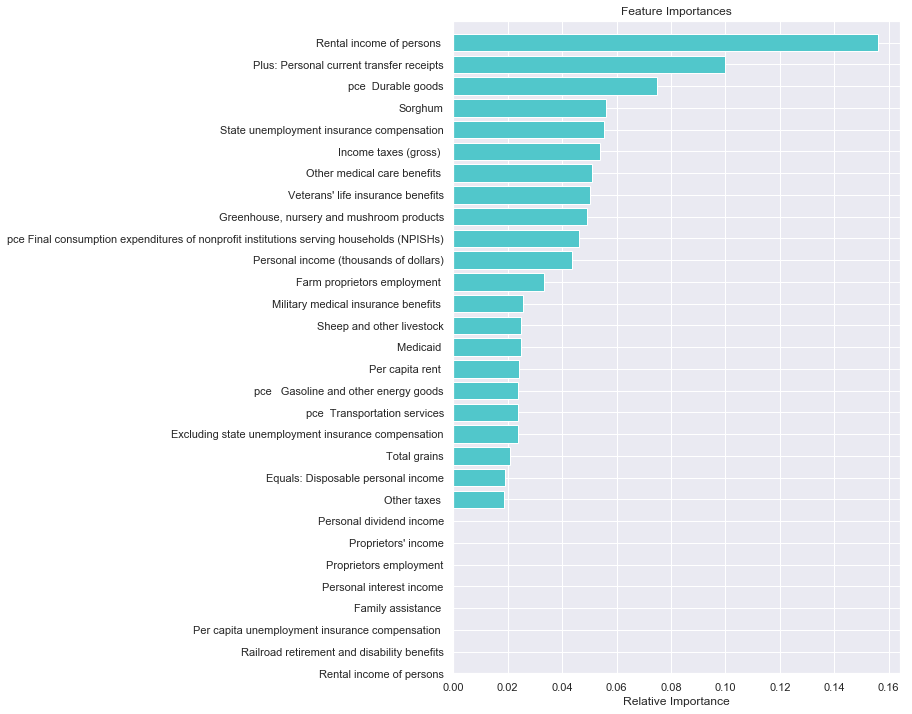

In [730]:
### Feature selection
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_alabama, y_train_Alabama_target0)

feature_importances_rf = pd.DataFrame(rfc.feature_importances_,index = x_train_alabama.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)

# feature importance plot
importances_rf = rfc.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(8,12))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

top_n =30
plt.barh(np.arange(top_n), importances_rf[indices_rf[-top_n:]],color='#51C7CB')

plt.yticks(np.arange(top_n), x_train_alabama.columns[indices_rf[-top_n:]])
plt.ylim(0, top_n)

plt.show()

In [731]:
#Top 20 important features
select_feature_list =feature_importances_rf[:50].index.tolist()

In [732]:
x_train_alabama_res, x_test_alabama_res =x_train_alabama.loc[:, select_feature_list],x_test_alabama.loc[:, select_feature_list]

In [733]:
feature_importances_rf.head(10)

,importance
Rental income of persons,0.156250
Plus: Personal current transfer receipts,0.100000
pce Durable goods,0.075000
Sorghum,0.056250
State unemployment insurance compensation,0.055556
Income taxes (gross),0.053846
Other medical care benefits,0.050909
Veterans' life insurance benefits,0.050174
"Greenhouse, nursery and mushroom products",0.049091
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs),0.046154


### Try thershold

In [736]:
from sklearn.feature_selection import SelectFromModel

# contract_establish target
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_alabama, y_train_Alabama_target0)

# Fit model using each importance as a threshold
thresholds = np.sort(rfc.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_alabama)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train_Alabama_target0)

    # eval model
    select_X_test = selection.transform(x_test_alabama)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_Alabama_target0, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000

In [737]:
# expand_establish target
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_alabama, y_train_Alabama_target1)

# Fit model using each importance as a threshold
thresholds = np.sort(rfc.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_alabama)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train_Alabama_target1)

    # eval model
    select_X_test = selection.transform(x_test_alabama)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_Alabama_target1, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000

In [738]:
# end_establish target
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_alabama, y_train_Alabama_target2)

# Fit model using each importance as a threshold
thresholds = np.sort(rfc.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_alabama)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train_Alabama_target2)

    # eval model
    select_X_test = selection.transform(x_test_alabama)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_Alabama_target2, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000, n=186, Accuracy: 60.00%
Thresh=0.000

In [740]:
# net_change target
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_alabama, y_train_Alabama_target3)

# Fit model using each importance as a threshold
thresholds = np.sort(rfc.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_alabama)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train_Alabama_target3)

    # eval model
    select_X_test = selection.transform(x_test_alabama)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_Alabama_target3, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accuracy: 100.00%
Thresh=0.000, n=186, Accu

In [742]:
# open_establish target
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_alabama, y_train_Alabama_target4)

# Fit model using each importance as a threshold
thresholds = np.sort(rfc.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_alabama)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train_Alabama_target4)

    # eval model
    select_X_test = selection.transform(x_test_alabama)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_Alabama_target4, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000, n=186, Accuracy: 20.00%
Thresh=0.000

In [743]:
# total_contract target
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_alabama, y_train_Alabama_target5)

# Fit model using each importance as a threshold
thresholds = np.sort(rfc.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_alabama)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train_Alabama_target5)

    # eval model
    select_X_test = selection.transform(x_test_alabama)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_Alabama_target5, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000

In [744]:
# total_expand target
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_alabama, y_train_Alabama_target6)

# Fit model using each importance as a threshold
thresholds = np.sort(rfc.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rfc, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_alabama)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train_Alabama_target6)

    # eval model
    select_X_test = selection.transform(x_test_alabama)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_Alabama_target6, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000, n=186, Accuracy: 40.00%
Thresh=0.000

**Conclusion:**

If select top 8 features,models can reach the largest accuracy.